In [67]:
from typing import Dict

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
train_results = pd.read_pickle('data/generated/drift/by_cell_agent/full_rewards_new_agent_train-train_no_sample20-23.pkl')
train_results

,cell_id,drift_score,quality,cum_reward,mom_reward
0,10932,0.750,0 0.989443 1 0.991112 2 0.99239...,0 10 1 20 2 30 3 4...,0 10 1 10 2 10 3 10 4 ...
1,12763,0.875,0 0.984121 1 0.983641 2 0.98618...,0 10 1 20 2 30 3 4...,0 10 1 10 2 10 3 10 4 ...
2,12782,0.875,0 0.993315 1 0.992291 2 0.99197...,0 10.000000 1 20.000000 2 ...,0 10.0 1 10.0 2 10.0 3 10....
3,12783,0.750,0 0.989670 1 0.987925 2 0.98741...,0 10 1 20 2 30 3 4...,0 10 1 10 2 10 3 10 4 ...
4,13301,0.750,0 0.976233 1 0.977470 2 0.97782...,0 10 1 20 2 30 3 ...,0 10 1 10 2 10 3 10 4 ...
...,...,...,...,...,...
989,5682,0.875,0 0.987072 1 0.987862 2 0.98871...,0 10 1 20 2 30 3 4...,0 10 1 10 2 10 3 10 4 ...
990,5683,0.875,0 0.989010 1 0.991326 2 0.98977...,0 10 1 20 2 30 3 4...,0 10 1 10 2 10 3 10 4 ...
991,12771,0.875,0 0.987917 1 0.987038 2 0.98835...,0 10 1 20 2 30 3 4...,0 10 1 10 2 10 3 10 4 ...
992,12773,0.875,0 0.987031 1 0.986686 2 0.98780...,0 10 1 20 2 30 3 4...,0 10 1 10 2 10 3 10 4 ...


In [13]:
for d_score in sorted(train_results.drift_score.unique()):
    print(d_score)

0.75
0.875
1.0


In [18]:
train_results.drift_score.value_counts()

drift_score
0.750    693
0.875    281
1.000     20
Name: count, dtype: int64

In [22]:
test_results = pd.read_pickle('data/generated/drift/by_cell_agent/full_rewards_new_agent_train-test_no_sample20-23.pkl')
test_results

,cell_id,drift_score,quality,cum_reward,mom_reward
0,10932,0.875,0 0.973693 1 0.982759 2 0.97755...,0 10 1 20 2 30 3 4...,0 10 1 10 2 10 3 10 4 ...
1,12762,0.875,0 0.790479 1 0.864897 2 0.86771...,0 -20 1 -10 2 0 3 1...,0 -20 1 10 2 10 3 10 4 ...
2,12781,0.875,0 0.974539 1 0.964948 2 0.96621...,0 10 1 20 2 30 3 4...,0 10 1 10 2 10 3 10 4 ...
3,12782,0.875,0 0.986578 1 0.985951 2 0.98578...,0 10 1 20 2 30 3 4...,0 10 1 10 2 10 3 10 4 ...
4,12783,1.000,0 0.899912 1 0.876038 2 0.88492...,0 10 1 20 2 30 3 4...,0 10 1 10 2 10 3 10 4 ...
...,...,...,...,...,...
989,5683,0.875,0 0.992360 1 0.992859 2 0.99236...,0 10 1 20 2 30 3 4...,0 10 1 10 2 10 3 10 4 ...
990,5682,0.875,0 0.992036 1 0.992546 2 0.99103...,0 10 1 20 2 30 3 4...,0 10 1 10 2 10 3 10 4 ...
991,12771,0.875,0 0.992431 1 0.991797 2 0.98959...,0 10 1 20 2 30 3 4...,0 10 1 10 2 10 3 10 4 ...
992,12772,1.000,0 0.978815 1 0.983106 2 0.97361...,0 10 1 20 2 30 3 4...,0 10 1 10 2 10 3 10 4 ...


In [66]:
test_results.drift_score.value_counts()

drift_score
0.875    723
1.000    271
Name: count, dtype: int64

In [30]:
type(train_results.drift_score)

pandas.core.series.Series

In [37]:
cols = train_results.columns[2:]
cols

Index(['quality', 'cum_reward', 'mom_reward'], dtype='object')

In [73]:
def reformat_full_results(df: pd.DataFrame) -> Dict[float, pd.DataFrame]:
    df_by_drift_results = {}

    for drift_score in sorted(df.drift_score.unique()):
        scores = df[df.drift_score == drift_score]

        for i in scores.index:
            series = scores.loc[i, cols]
            df_temp = pd.DataFrame()

            for s in series:
                df_temp = pd.concat([df_temp, s], axis=1)

            df_by_drift_results[drift_score] = pd.concat([df_by_drift_results.get(drift_score, pd.DataFrame()), df_temp])

    return df_by_drift_results

In [74]:
train_by_drift_results = reformat_full_results(train_results)
test_by_drift_results = reformat_full_results(test_results)


In [75]:
train_by_drift_results

{0.75:      Quality Rate  cum_reward  mom_reward
 0        0.989443        10.0        10.0
 1        0.991112        20.0        10.0
 2        0.992393        30.0        10.0
 3        0.992145        40.0        10.0
 4        0.988504        50.0        10.0
 ..            ...         ...         ...
 827      0.989034      8130.0        10.0
 828      0.989629      8140.0        10.0
 829      0.986283      8150.0        10.0
 830      0.982717      8160.0        10.0
 831      0.963331      8170.0        10.0
 
 [586902 rows x 3 columns],
 0.875:      Quality Rate  cum_reward  mom_reward
 0        0.984121        10.0        10.0
 1        0.983641        20.0        10.0
 2        0.986180        30.0        10.0
 3        0.986530        40.0        10.0
 4        0.985231        50.0        10.0
 ..            ...         ...         ...
 466      0.982985      4580.0        10.0
 467      0.980482      4590.0        10.0
 468      0.983179      4600.0        10.0
 469      0

In [76]:
test_by_drift_results

{0.875:      Quality Rate  cum_reward  mom_reward
 0        0.973693        10.0        10.0
 1        0.982759        20.0        10.0
 2        0.977550        30.0        10.0
 3        0.983752        40.0        10.0
 4        0.984628        50.0        10.0
 ..            ...         ...         ...
 108      0.992713      1090.0        10.0
 109      0.975444      1100.0        10.0
 110      0.984160      1110.0        10.0
 111      0.987911      1120.0        10.0
 112      0.992299      1130.0        10.0
 
 [147532 rows x 3 columns],
 1.0:      Quality Rate  cum_reward  mom_reward
 0        0.899912        10.0        10.0
 1        0.876038        20.0        10.0
 2        0.884927        30.0        10.0
 3        0.910126        40.0        10.0
 4        0.935925        50.0        10.0
 ..            ...         ...         ...
 108      0.941389      1060.0        10.0
 109      0.968339      1070.0        10.0
 110      0.956026      1080.0        10.0
 111      0.

In [84]:
train_full = pd.concat(train_by_drift_results.values())
test_full = pd.concat(test_by_drift_results.values())
train_full

,Quality Rate,cum_reward,mom_reward
0,0.989443,10.000000,10.0
1,0.991112,20.000000,10.0
2,0.992393,30.000000,10.0
3,0.992145,40.000000,10.0
4,0.988504,50.000000,10.0
...,...,...,...
770,0.851496,6578.184342,10.0
771,0.921015,6588.184342,10.0
772,0.989961,6598.184342,10.0
773,0.987872,6608.184342,10.0


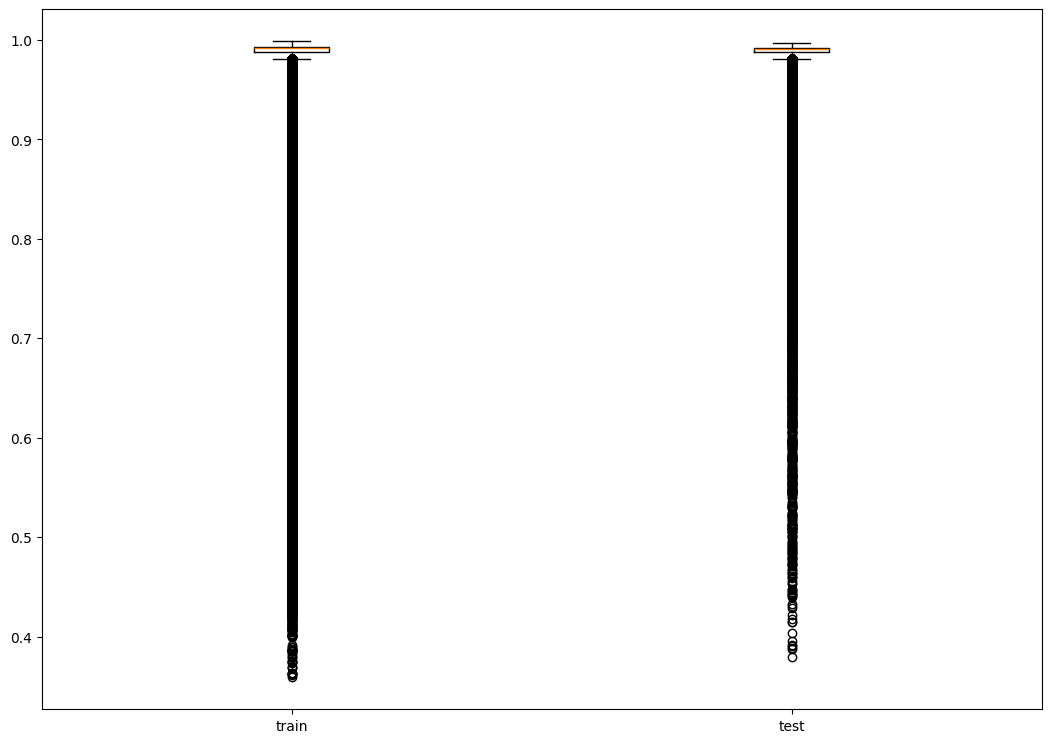

In [86]:

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot([train_full['Quality Rate'], test_full['Quality Rate']])
ax.set_xticklabels(['train', 'test'])
# show plot
plt.show()

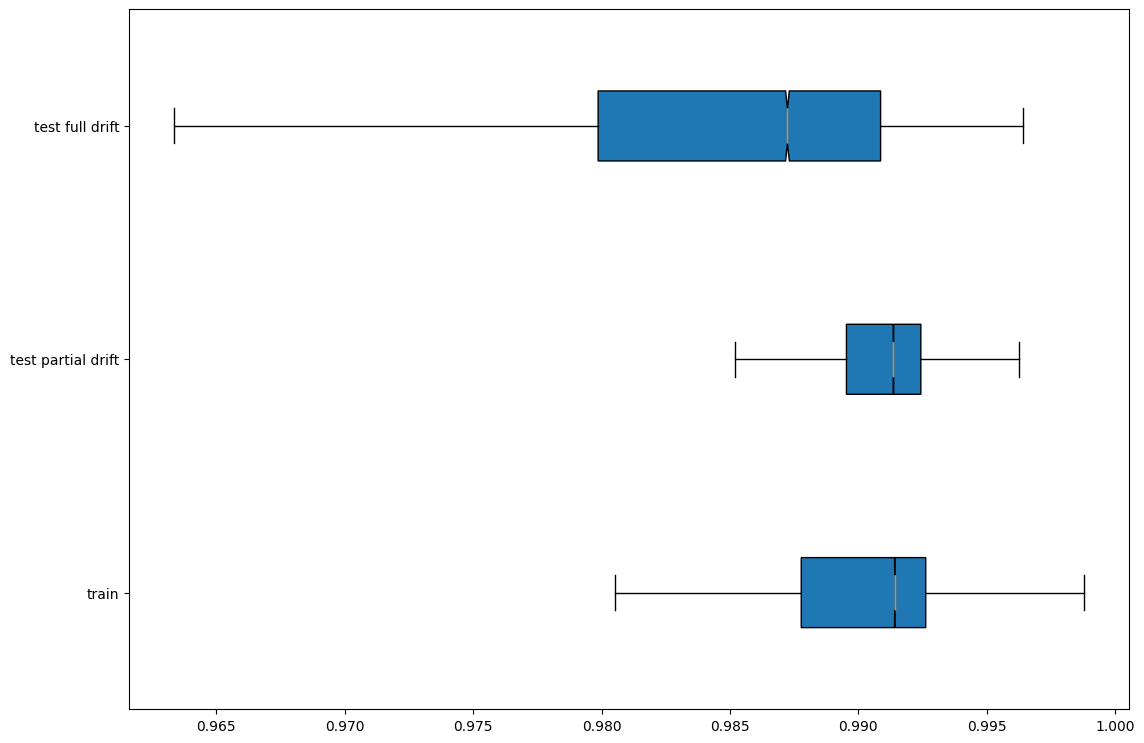

In [95]:

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot([train_full['Quality Rate'], test_by_drift_results[0.875]['Quality Rate'], test_by_drift_results[1.]['Quality Rate']],
                patch_artist = True, notch ='True', vert = 0,  showfliers=False)
ax.set_yticklabels(['train', 'test partial drift', 'test full drift'])
# plt.xscale('log')
# show plot
plt.show()

In [89]:
train_full.describe()

,Quality Rate,cum_reward,mom_reward
count,831210.000000,831210.000000,831210.000000
mean,0.986106,4095.830585,9.507405
std,0.031559,2481.851720,5.133862
min,0.358991,-13040.000000,-203.017792
25%,0.987775,2010.000000,10.000000
50%,0.991413,4090.000000,10.000000
75%,0.992622,6200.000000,10.000000
max,0.998766,8470.000000,10.000000


In [90]:
test_full.describe()

,Quality Rate,cum_reward,mom_reward
count,203077.000000,203077.000000,203077.000000
mean,0.985393,983.782566,9.734059
std,0.027870,602.851581,4.183368
min,0.379827,-1461.988238,-172.640971
25%,0.987563,470.000000,10.000000
50%,0.990822,980.000000,10.000000
75%,0.992216,1492.464692,10.000000
max,0.996884,2070.000000,10.000000
